In [15]:
import numpy as np
import skvideo.io
import itertools
from matplotlib import pyplot as plt
from tqdm import tqdm
# from gc import collect as gc
%matplotlib inline

In [16]:
# generator of frames
frame_reader = skvideo.io.vreader('media/f2_leaves.mp4') #, as_grey=True)

In [70]:
def image_thresh(a):
    a = a.copy()
    a[a < 0] = 0
    a[a > 255] = 255
    a = np.floor(a)
    return a.astype("uint8")

In [60]:
# return runs of WINDOW frames at a time
# each run is an array of numpy arrays
def get_frame_windows(frames, window):
    buf = []
    frames = (frame.astype('float64') for frame in frames)
    while len(buf) < window - 1:
        buf.append(next(frames))
    for frame in frames:
        buf.append(frame)
        yield buf[1:]

In [61]:
def frame_weighted_avg(frames, weights):
    frame = next(frames)
    denom = next(weights)
    frame *= denom
    
    for (f, w) in zip(frames, weights):
        frame += f * w
        denom += w
    
    return frame / denom

In [75]:
def sinc_interp_frames(windows, factor=2):
    for window in windows:
        window_size = len(window)
        for i in range(factor):
            # fractional offsets, for sinc
            offsets = (np.arange(-window_size // 2,
                                 -window_size // 2 + window_size)
                       - i/factor)
            weights = np.sinc(offsets)
            
            frame = image_thresh(frame_weighted_avg(iter(window),
                                                    iter(weights)))
            yield frame

In [76]:
result_frames = sinc_interp_frames(get_frame_windows(frame_reader, 2))

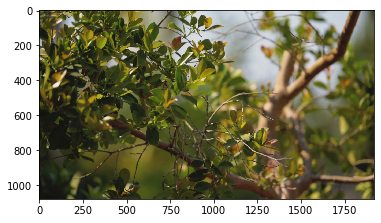

In [77]:
plt.imshow(next(result_frames))

In [78]:
# now to figure out how to write all of them to a video file lol